# Report(lab7) 
by Xiaohuan Pei(6603592)
# Classification Task: Car Evaluation

## The lab following meet all requirements:
1. Firstly divide the whole dateset into 8:2 randomly. (80% for training, 20% for testing )
2. Try to build up the optimized classification model. (try grid search for model parameters optimization)

except using the model given by demo, I add more estimators to fit the data:
such as GradientBoostingClassifier, AdaBoostClassifier, GaussianNB ......

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, learning_curve

### 1.Load data:  read -> check -> normalize -> shuffle split to 8:2

In [2]:
url = 'car.csv'
names = ['buying', 'maint', 'doors', 'persons', 'lug_root', 'safety', 'acceptablility']
ds = pd.read_csv(url, names=names)
ds.head()

,buying,maint,doors,persons,lug_root,safety,acceptablility
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   buying          1728 non-null   object
 1   maint           1728 non-null   object
 2   doors           1728 non-null   object
 3   persons         1728 non-null   object
 4   lug_root        1728 non-null   object
 5   safety          1728 non-null   object
 6   acceptablility  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
ds.describe()

,buying,maint,doors,persons,lug_root,safety,acceptablility
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,5more,more,small,low,unacc
freq,432,432,432,576,576,576,1210


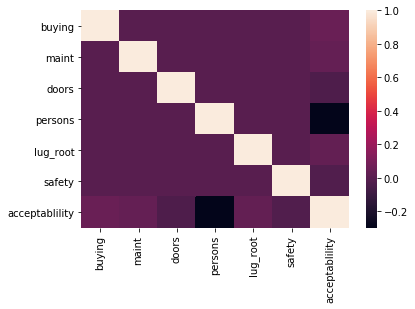

In [5]:
le = LabelEncoder()
datas = ds.apply(le.fit_transform)
sns.heatmap(datas.corr())

In [6]:
df = datas.values
np.random.shuffle(df)
split = int(0.80 * datas.shape[0])
x = df[:, :6]
y = df[:, 6]
x = x.astype(int)
y = y.astype(int)
x_train = x[:split]
y_train = y[:split]
x_test = x[split:]
y_test = y[split:]

print(x_train.shape, y_train.shape)

(1382, 6) (1382,)


## 2. Test different kinds of models to fit and predict datas
The models I use is:
RandomForestClassifier, KNeighborsClassifier, DecisionTreeClassifier, 
GradientBoostingClassifier, AdaBoostClassifier, GaussianNB, SVC

In [7]:
preds, scores = {'LogisticRegression': 0,
                 'RandomForestClassifier': 0, 
                 'KNeighborsClassifier': 0, 
                 'DecisionTreeClassifier': 0, 
                'GradientBoostingClassifier': 0, 
                 'AdaBoostClassifier': 0, 
                 'GaussianNB': 0, 
                 'SVC': 0,}, {'LogisticRegression': 0,
                 'RandomForestClassifier': 0, 
                 'KNeighborsClassifier': 0, 
                 'DecisionTreeClassifier': 0, 
                'GradientBoostingClassifier': 0, 
                 'AdaBoostClassifier': 0, 
                 'GaussianNB': 0, 
                 'SVC': 0,}

In [8]:
logreg = LogisticRegression(solver='newton-cg',multi_class='ovr')
logreg.fit(x_train, y_train)
preds['LogisticRegression'] = logreg.predict(x_test)
scores['LogisticRegression'] = logreg.score(x_test, y_test)
print(scores['LogisticRegression'])

0.6936416184971098


In [9]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
preds['RandomForestClassifier'] = rfc.predict(x_test)
scores['RandomForestClassifier'] = rfc.score(x_test, y_test)
print(scores['RandomForestClassifier'])

0.976878612716763


In [10]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
preds['KNeighborsClassifier'] = knc.predict(x_test)
scores['KNeighborsClassifier'] = knc.score(x_test, y_test)
print(scores['KNeighborsClassifier'])

0.8728323699421965


In [11]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
preds['DecisionTreeClassifier'] = dtc.predict(x_test)
scores['DecisionTreeClassifier'] = dtc.score(x_test, y_test)
print(scores['DecisionTreeClassifier'])

0.9884393063583815


In [12]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
preds['GradientBoostingClassifier'] = gbc.predict(x_test)
scores['GradientBoostingClassifier'] = gbc.score(x_test, y_test)
print(scores['GradientBoostingClassifier'])

0.9797687861271677


In [13]:
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
preds['AdaBoostClassifier'] = abc.predict(x_test)
scores['AdaBoostClassifier'] = abc.score(x_test, y_test)
print(scores['AdaBoostClassifier'])

0.7427745664739884


In [14]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
preds['GaussianNB'] = gnb.predict(x_test)
scores['GaussianNB'] = gnb.score(x_test, y_test)
print(scores['GaussianNB'])

0.6416184971098265


In [15]:
svc = SVC()
svc.fit(x_train, y_train)
preds['SVC'] = svc.predict(x_test)
scores['SVC'] = svc.score(x_test, y_test)
print(scores['SVC'])

0.8901734104046243


## Results of prediction and scores by different models

In [16]:
df_pred = pd.DataFrame.from_dict(preds)
df_pred.head()

,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier,GradientBoostingClassifier,AdaBoostClassifier,GaussianNB,SVC
0,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2


In [17]:
df_pred.describe()

,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier,GradientBoostingClassifier,AdaBoostClassifier,GaussianNB,SVC
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,1.780347,1.526012,1.583815,1.497110,1.497110,1.554913,2.179191,1.618497
std,0.626253,0.894858,0.834178,0.911277,0.917617,0.959252,0.639044,0.850646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,1.000000,0.250000,0.000000,2.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
max,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [18]:
for k, v in scores.items():
    print('estimator: {0:26}   |  scores: {1:10.6f}'.format(k, v))

estimator: LogisticRegression           |  scores:   0.693642
estimator: RandomForestClassifier       |  scores:   0.976879
estimator: KNeighborsClassifier         |  scores:   0.872832
estimator: DecisionTreeClassifier       |  scores:   0.988439
estimator: GradientBoostingClassifier   |  scores:   0.979769
estimator: AdaBoostClassifier           |  scores:   0.742775
estimator: GaussianNB                   |  scores:   0.641618
estimator: SVC                          |  scores:   0.890173


# Grid search on RandomForest:

In [19]:
pram_grid = {'criterion': ['gini', 'entropy'],
         'max_depth': [2, 5, 10, 20],
         'max_features': [2, 4, 6, 'auto'],
         'max_leaf_nodes': [2, 3, None],}

![](image1.png)

In [20]:
grid = GridSearchCV(estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=51), 
                   param_grid=pram_grid, cv=10, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 4, 'max_leaf_nodes': None}
0.9797622771348138


# Show learnning curve to compare the Naive Bayes and SVC(Example)

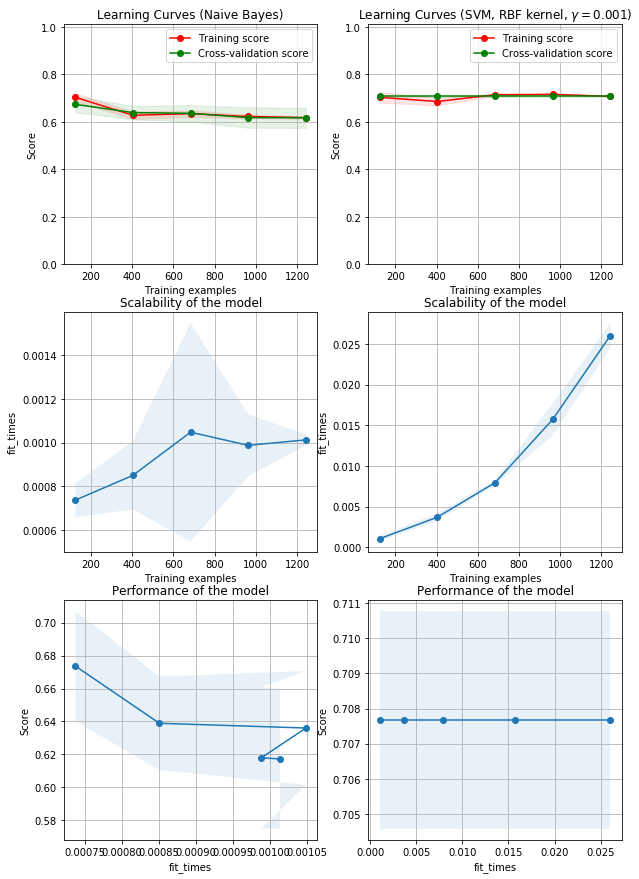

In [24]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    
    return plt

fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = 10

estimator = GaussianNB()
plot_learning_curve(estimator, title, x_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=None)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, x_train, y_train, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=None)

plt.show()